In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
    --------------------------------------- 7.9/375.7 MB 40.7 MB/s eta 0:00:10
   - -------------------------------------- 14.7/375.7 MB 37.0 MB/s eta 0:00:10
   -- ------------------------------------- 19.9/375.7 MB 33.1 MB/s eta 0:00:11
   --- ------------------------------------ 28.3/375.7 MB 34.5 MB/s eta 0:00:11
   --- ------------------------------------ 35.4/375.7 MB 34.1 MB/s eta 0:00:10
   ---- ----------------------------------- 44.3/375.7 MB 35.7 MB/s eta 0:00:10
   ----- ---------------------------------- 48.8/375.7 MB 33.7 MB/s eta 0:00:10
   ------ --------------------------------- 57.9/375.7 MB 34.8 MB/s eta 0:00:10
   ------- -------------------------------- 66.3/375.7 MB 35.5 MB/s eta 0:00:09
   -------- ------------------------------- 75.5/375.7 MB 36.5 MB/s eta 0:00:09
   --------- ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Found 3001 images belonging to 8 classes.
Found 743 images belonging to 8 classes.


C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\ghwns\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 94s 968ms/step - accuracy: 0.1308 - loss: 2.0941 - val_accuracy: 0.1561 - val_loss: 2.0587 - learning_rate: 1.0000e-04
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 87s 925ms/step - accuracy: 0.1669 - loss: 2.0599 - val_accuracy: 0.1803 - val_loss: 2.0349 - learning_rate: 1.0000e-04
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 144s 949ms/step - accuracy: 0.1985 - loss: 2.0240 - val_accuracy: 0.2315 - val_loss: 1.9699 - learning_rate: 1.0000e-04
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 937ms/step - accuracy: 0.2260 - loss: 1.9780 - val_accuracy: 0.1992 - val_loss: 1.9806 - learning_rate: 1.0000e-04
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.2191 - loss: 1.9688
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 935ms/step - accuracy: 0.2190 - loss: 1.9688 - val_accuracy: 0.2275 - val_loss: 1.9804 - learning_rate: 1.0000e-04
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 87s 925ms/step - accuracy

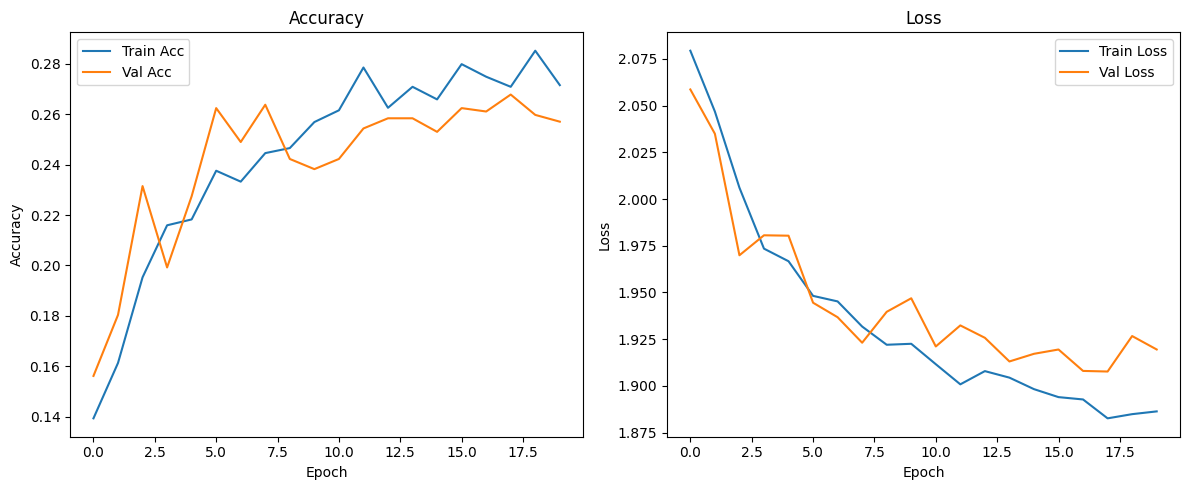

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# 📂 Paths & Params
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
data_dir = r"C:\Users\ghwns\HJ_git\CV-Projects\real-time-daily-activity-recognizer\images"

# ✅ Data Augmentation (Grayscale)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',  # ✅ 그레이스케일로 로드
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    shuffle=False
)

# ✅ Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))

# ✅ Custom CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# ✅ Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[lr_scheduler, early_stop],
    class_weight=class_weights
)

# ✅ Best Epoch & Accuracy
best_epoch = max(enumerate(history.history['val_accuracy']), key=lambda x: x[1])
print(f"\n🏆 Best Val Acc: {best_epoch[1]:.4f} at Epoch {best_epoch[0] + 1}")

# ✅ Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()